In [1]:
import pandas as pd
import igraph as ig   
import pandas as pd 
import random
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

In [20]:
df=pd.read_csv("2018_capitalbikeshare_tripdata.csv")
df['Start station number'] = df['Start station number'].astype(str)
df['End station number'] = df['End station number'].astype(str)

In [21]:
df

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Adams Mill & Columbia Rd NW,31400,Georgia & New Hampshire Ave NW,W00886,Member
1,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W01435,Casual
2,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W21242,Casual
3,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,14th & Upshur St NW,31103,16th & Harvard St NW,W21322,Casual
4,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,4th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00119,Member
...,...,...,...,...,...,...,...,...,...
3542679,3313,2018-12-31 23:37:22,2019-01-01 00:32:36,31615,6th & H St NE,31624,North Capitol St & F St NW,W00159,Member
3542680,888,2018-12-31 23:42:18,2018-12-31 23:57:07,31618,4th & East Capitol St NE,31509,New Jersey Ave & R St NW,W22026,Member
3542681,2332,2018-12-31 23:44:23,2019-01-01 00:23:16,31907,Franklin & S Washington St,32406,Fleet St & Waterfront St,W23900,Member
3542682,307,2018-12-31 23:52:42,2018-12-31 23:57:50,31114,18th St & Wyoming Ave NW,31103,16th & Harvard St NW,W00761,Member


### Creating a network 

In [22]:
G = ig.Graph(directed=True)
stations = set(df['Start station number']).union(set(df['End station number']))
G.add_vertices(list(stations))
edge_weights = {}

# Add edges with weights
for index, row in df.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if (start_station, end_station) in edge_weights:
        # Increment weight if the edge already exists
        edge_weights[(start_station, end_station)] += 1
    else:
        # Add a new edge with weight 1
        edge_weights[(start_station, end_station)] = 1

# Add edges with their weights
for (start_station, end_station), weight in edge_weights.items():
    G.add_edge(start_station, end_station, weight=weight)

# Plot the graph
#ig.plot(G, bbox=(500, 500))
num_nodes = G.vcount()
print("Number of nodes in Network_A:", num_nodes)

num_edges = G.ecount()
print("Number of edges in Network_A:", num_edges)

Number of nodes in Network_A: 528
Number of edges in Network_A: 77120


### Implement the two types of node deletion strategies on your network, and plot the associated changes in average shortest path length (i.e., average distance) & diameter as a function of the fraction of nodes removed. Do the resulting plots resemble the Fig. 2 on Pg. 12 of the Albert et al. (2000) paper above? Why do you (/don’t you) see this pattern?

### Using Degree to select the most important nodes for target removal nodes 

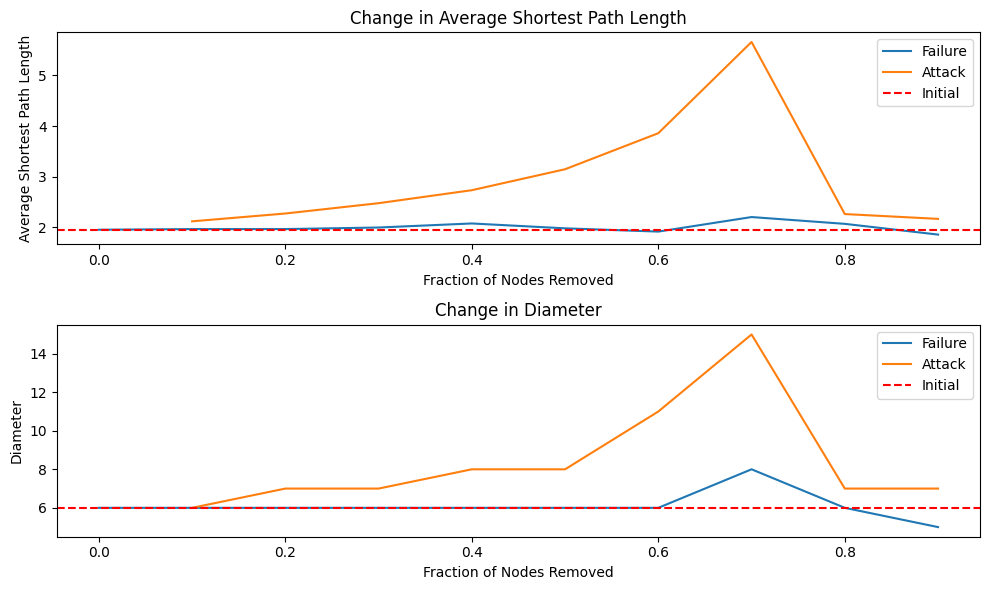

In [23]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
#G = ig.Graph.Erdos_Renyi(1000, 0.05)

# Calculate initial average shortest path length and diameter
initial_avg_shortest_path_length = G.average_path_length()
initial_diameter = G.diameter()
# Define the fraction of nodes to remove
fraction_to_remove = np.linspace(0, 0.9, 10)
# Initialize lists to store results
avg_shortest_path_lengths_random = []
diameters_random = []
avg_shortest_path_lengths_targeted = []
diameters_targeted = []

# Perform node deletion for each fraction
for frac in fraction_to_remove:
    # Create copies of the original graph for each strategy
    G_random = G.copy()
    G_targeted = G.copy()
    # Determine number of nodes to remove
    num_nodes_to_remove = int(frac * G.vcount())
    # Random node deletion
    nodes_to_remove_random = np.random.choice(G_random.vs.indices, size=num_nodes_to_remove, replace=False)
    G_random.delete_vertices(nodes_to_remove_random)
    # Targeted node deletion (remove highest degree nodes)
    degrees = G_targeted.degree()
    nodes_to_remove_targeted = np.argsort(degrees)[-num_nodes_to_remove:]
    G_targeted.delete_vertices(nodes_to_remove_targeted)
    # Calculate average shortest path length and diameter after node deletion
    avg_shortest_path_lengths_random.append(G_random.average_path_length())
    diameters_random.append(G_random.diameter())
    avg_shortest_path_lengths_targeted.append(G_targeted.average_path_length())
    diameters_targeted.append(G_targeted.diameter())

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(fraction_to_remove, avg_shortest_path_lengths_random, label='Failure')
plt.plot(fraction_to_remove, avg_shortest_path_lengths_targeted, label='Attack')
plt.axhline(y=initial_avg_shortest_path_length, color='r', linestyle='--', label='Initial')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Average Shortest Path Length')
plt.title('Change in Average Shortest Path Length')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fraction_to_remove, diameters_random, label='Failure')
plt.plot(fraction_to_remove, diameters_targeted, label='Attack')
plt.axhline(y=initial_diameter, color='r', linestyle='--', label='Initial')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Diameter')
plt.title('Change in Diameter')
plt.legend()

plt.tight_layout()
plt.show()


### The pattern closely resembles the plots depicted in the paper. In this scenario, when random nodes fail, the average shortest path and diameter are not significantly affected, indicating that the structure of the network is minimally impacted. However, in the case of targeted node attacks, the network structure is significantly affected. The average shortest path and diameter start increasing as more crucial nodes are removed, causing an impact on the entire network structure.

### Can you think of any other important graph-level metric, apart from average distance or diameter, that can potentially measure structural resilience of the network to such errors and attacks? Compute this metric, and test if this metric also shows significant variation in response to these two types of node deletions

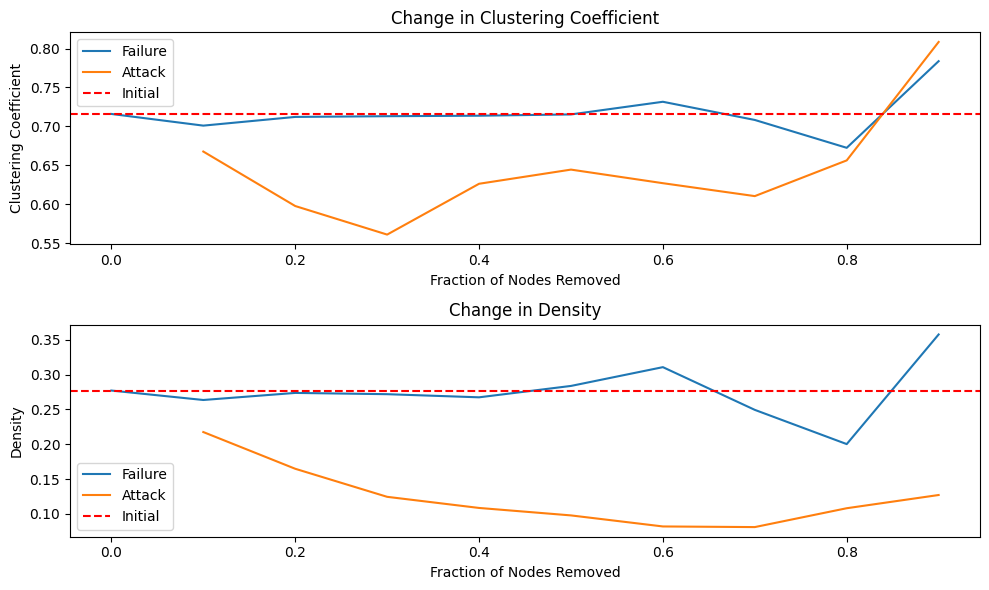

In [25]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
# Calculate initial clustering coefficient and density
initial_clustering_coefficient = G.transitivity_undirected()
initial_density = G.density()

# Define the fraction of nodes to remove
fraction_to_remove = np.linspace(0, 0.9, 10)

# Initialize lists to store results
clustering_coefficients_random = []
densities_random = []
clustering_coefficients_targeted = []
densities_targeted = []

# Perform node deletion for each fraction
for frac in fraction_to_remove:
    # Create copies of the original graph for each strategy
    G_random = G.copy()
    G_targeted = G.copy()
    
    # Determine number of nodes to remove
    num_nodes_to_remove = int(frac * G.vcount())
    
    # Random node deletion
    nodes_to_remove_random = np.random.choice(G_random.vs.indices, size=num_nodes_to_remove, replace=False)
    G_random.delete_vertices(nodes_to_remove_random)
    
    # Targeted node deletion (remove highest degree nodes)
    degrees = G_targeted.degree()
    nodes_to_remove_targeted = np.argsort(degrees)[-num_nodes_to_remove:]
    G_targeted.delete_vertices(nodes_to_remove_targeted)
    
    # Calculate clustering coefficient and density after node deletion
    clustering_coefficients_random.append(G_random.transitivity_undirected())
    densities_random.append(G_random.density())
    clustering_coefficients_targeted.append(G_targeted.transitivity_undirected())
    densities_targeted.append(G_targeted.density())

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(fraction_to_remove, clustering_coefficients_random, label='Failure')
plt.plot(fraction_to_remove, clustering_coefficients_targeted, label='Attack')
plt.axhline(y=initial_clustering_coefficient, color='r', linestyle='--', label='Initial')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Clustering Coefficient')
plt.title('Change in Clustering Coefficient')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fraction_to_remove, densities_random, label='Failure')
plt.plot(fraction_to_remove, densities_targeted, label='Attack')
plt.axhline(y=initial_density, color='r', linestyle='--', label='Initial')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Density')
plt.title('Change in Density')
plt.legend()

plt.tight_layout()
plt.show()


### The clustering coefficient and density are two other graph-level metrics that can potentially measure structural resilience. In this scenario, when random nodes fail, the network structure is minimally impacted, as evidenced by consistent clustering coefficients and densities across different fractions of node removal. However, when targeting specific nodes for removal, the clustering coefficient and density got affected upon removing more target nodes , indicating that the network structure is significantly affected when we remove trageted nodes .

### Repeat the above set of analyses for the network over time (e.g., for each month or quarter or year). Do you see any change in the resilience of the network over time? What patterns (if any) do you see from this temporal analysis?


In [7]:
month1=pd.read_csv("201801_capitalbikeshare_tripdata.csv")
month2=pd.read_csv("201802-capitalbikeshare-tripdata.csv")
month3=pd.read_csv("201803-capitalbikeshare-tripdata.csv")
month4=pd.read_csv("201804-capitalbikeshare-tripdata.csv")
month5=pd.read_csv("201805-capitalbikeshare-tripdata.csv")

### Creating for building a network 

In [8]:
def creating_network(df):
    df['Start station number'] = df['Start station number'].astype(str)
    df['End station number'] = df['End station number'].astype(str)
    G = ig.Graph(directed=True)
    stations = set(df['Start station number']).union(set(df['End station number']))
    G.add_vertices(list(stations))
    edge_weights = {}

    # Add edges with weights
    for index, row in df.iterrows():
        start_station = row['Start station number']
        end_station = row['End station number']
        if (start_station, end_station) in edge_weights:
            # Increment weight if the edge already exists
            edge_weights[(start_station, end_station)] += 1
        else:
            # Add a new edge with weight 1
            edge_weights[(start_station, end_station)] = 1

    # Add edges with their weights
    for (start_station, end_station), weight in edge_weights.items():
        G.add_edge(start_station, end_station, weight=weight)

    # Plot the graph
    #ig.plot(G, bbox=(500, 500))
    num_nodes = G.vcount()
    print("Number of nodes in Network_A:", num_nodes)

    num_edges = G.ecount()
    print("Number of edges in Network_A:", num_edges)
    
    return G 
    

In [9]:
G1 = creating_network(month1)

Number of nodes in Network_A: 486
Number of edges in Network_A: 28474


In [10]:
G2 = creating_network(month2)

Number of nodes in Network_A: 488
Number of edges in Network_A: 30368


In [11]:
G3 = creating_network(month3)

Number of nodes in Network_A: 496
Number of edges in Network_A: 33834


In [12]:
G4 = creating_network(month4)

Number of nodes in Network_A: 497
Number of edges in Network_A: 40200


In [ ]:
G5 = creating_network(month5)

### Node deletion Effect on clustering coefficient and density across time 

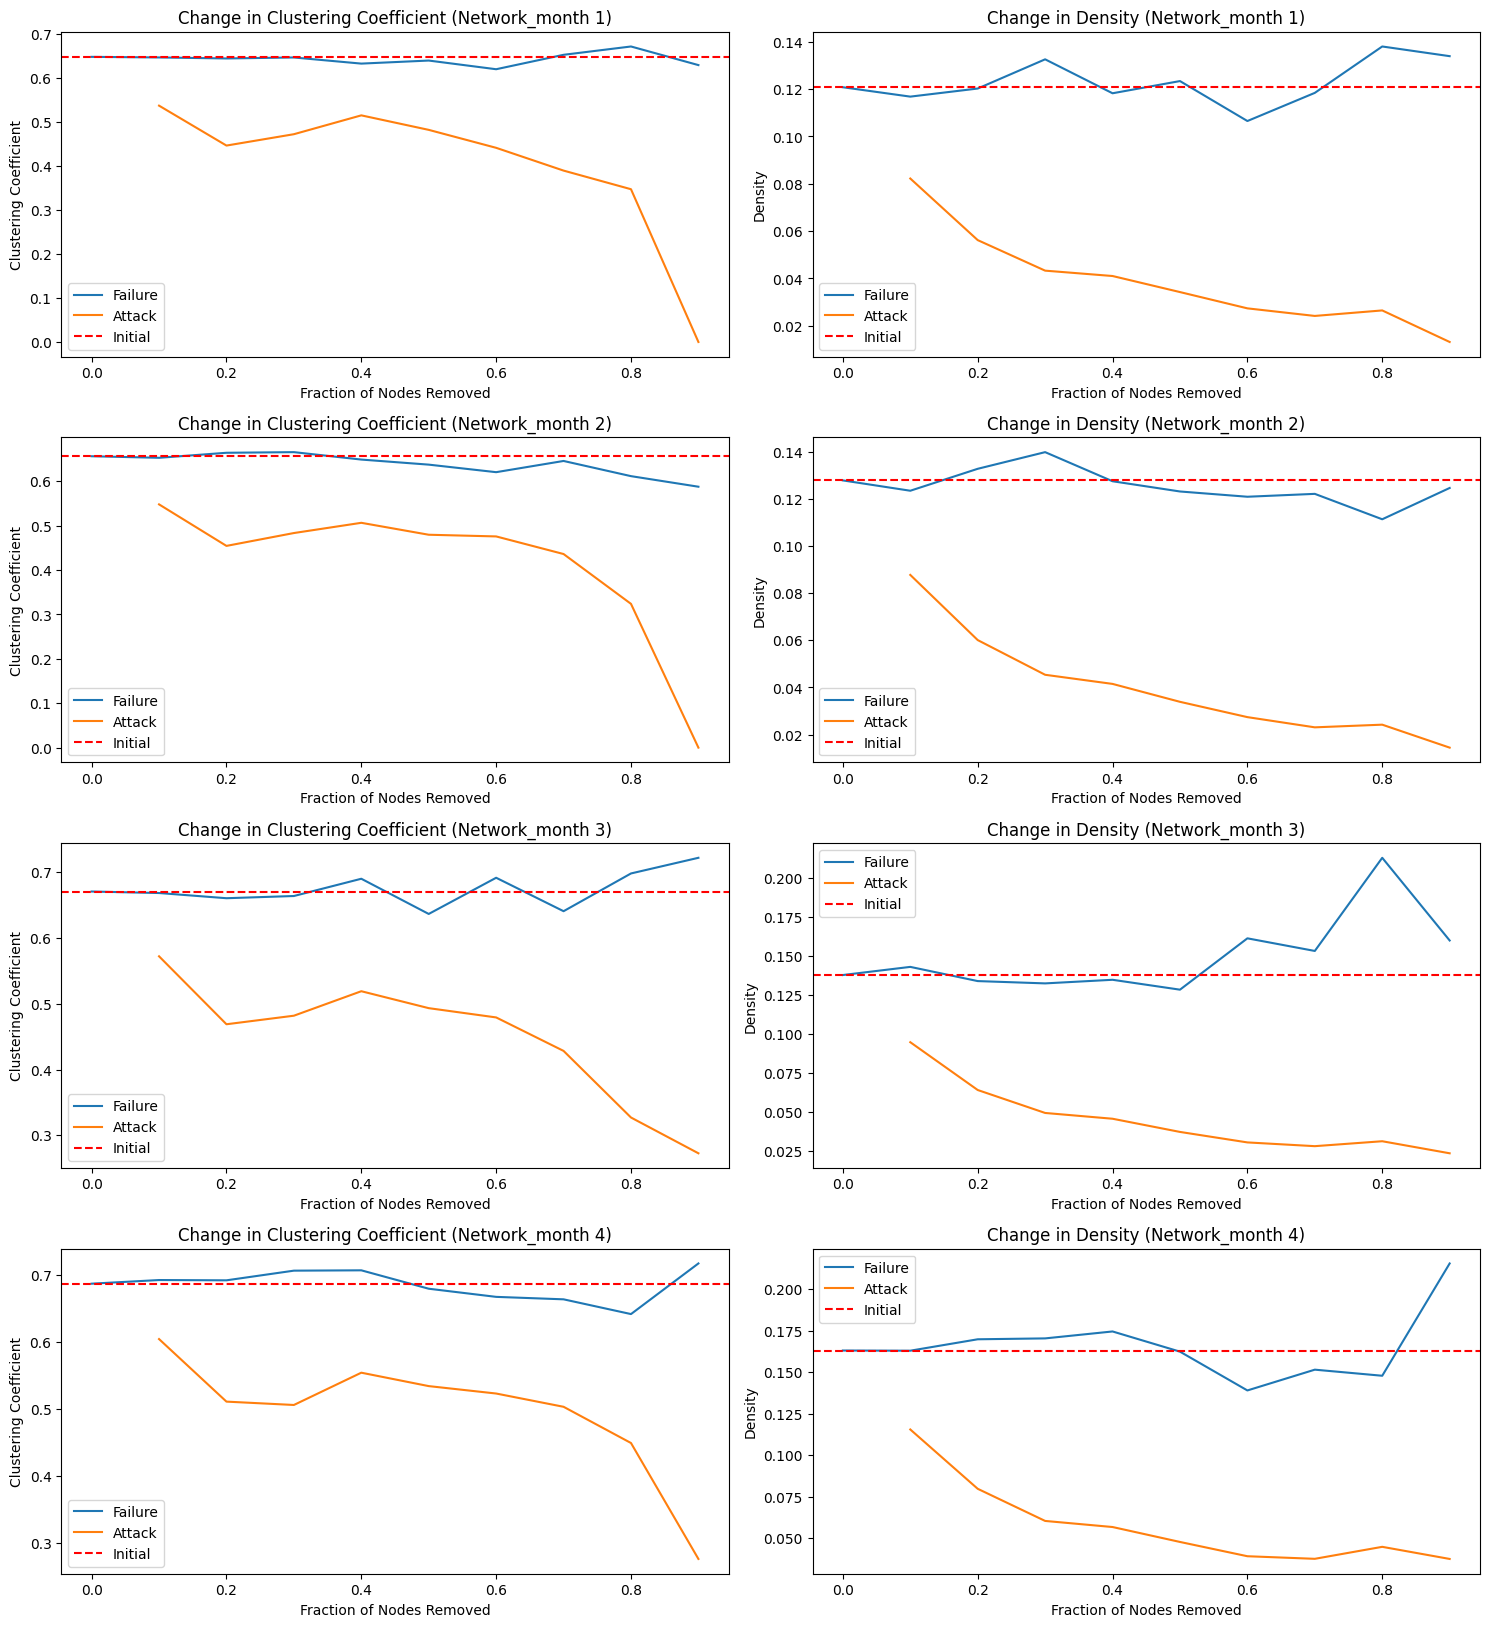

In [13]:
results = []
networks=[G1,G2,G3,G4,G5]
for G in networks:
    # Calculate initial clustering coefficient and density
    initial_clustering_coefficient = G.transitivity_undirected()
    initial_density = G.density()

    # Define the fraction of nodes to remove
    fraction_to_remove = np.linspace(0, 0.9, 10)

    # Initialize lists to store results
    clustering_coefficients_random = []
    densities_random = []
    clustering_coefficients_targeted = []
    densities_targeted = []

    # Perform node deletion for each fraction
    for frac in fraction_to_remove:
        # Create copies of the original graph for each strategy
        G_random = G.copy()
        G_targeted = G.copy()

        # Determine number of nodes to remove
        num_nodes_to_remove = int(frac * G.vcount())

        # Random node deletion
        nodes_to_remove_random = np.random.choice(G_random.vs.indices, size=num_nodes_to_remove, replace=False)
        G_random.delete_vertices(nodes_to_remove_random)

        # Targeted node deletion (remove highest degree nodes)
        degrees = G_targeted.degree()
        nodes_to_remove_targeted = np.argsort(degrees)[-num_nodes_to_remove:]
        G_targeted.delete_vertices(nodes_to_remove_targeted)

        # Calculate clustering coefficient and density after node deletion
        clustering_coefficients_random.append(G_random.transitivity_undirected())
        densities_random.append(G_random.density())
        clustering_coefficients_targeted.append(G_targeted.transitivity_undirected())
        densities_targeted.append(G_targeted.density())

    # Store the results for this network
    results.append({
        'initial_clustering_coefficient': initial_clustering_coefficient,
        'initial_density': initial_density,
        'clustering_coefficients_random': clustering_coefficients_random,
        'densities_random': densities_random,
        'clustering_coefficients_targeted': clustering_coefficients_targeted,
        'densities_targeted': densities_targeted
    })

# Plot the results for each network
plt.figure(figsize=(15, 20))

for i, result in enumerate(results):
    plt.subplot(5, 2, i * 2 + 1)
    plt.plot(fraction_to_remove, result['clustering_coefficients_random'], label='Failure')
    plt.plot(fraction_to_remove, result['clustering_coefficients_targeted'], label='Attack')
    plt.axhline(y=result['initial_clustering_coefficient'], color='r', linestyle='--', label='Initial')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Clustering Coefficient')
    plt.title(f'Change in Clustering Coefficient (Network_month {i + 1})')
    plt.legend()

    plt.subplot(5, 2, i * 2 + 2)
    plt.plot(fraction_to_remove, result['densities_random'], label='Failure')
    plt.plot(fraction_to_remove, result['densities_targeted'], label='Attack')
    plt.axhline(y=result['initial_density'], color='r', linestyle='--', label='Initial')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Density')
    plt.title(f'Change in Density (Network_month {i + 1})')
    plt.legend()

plt.tight_layout()
plt.show()


## Node deletion Effect on Avergae shorest path and diameter across time 

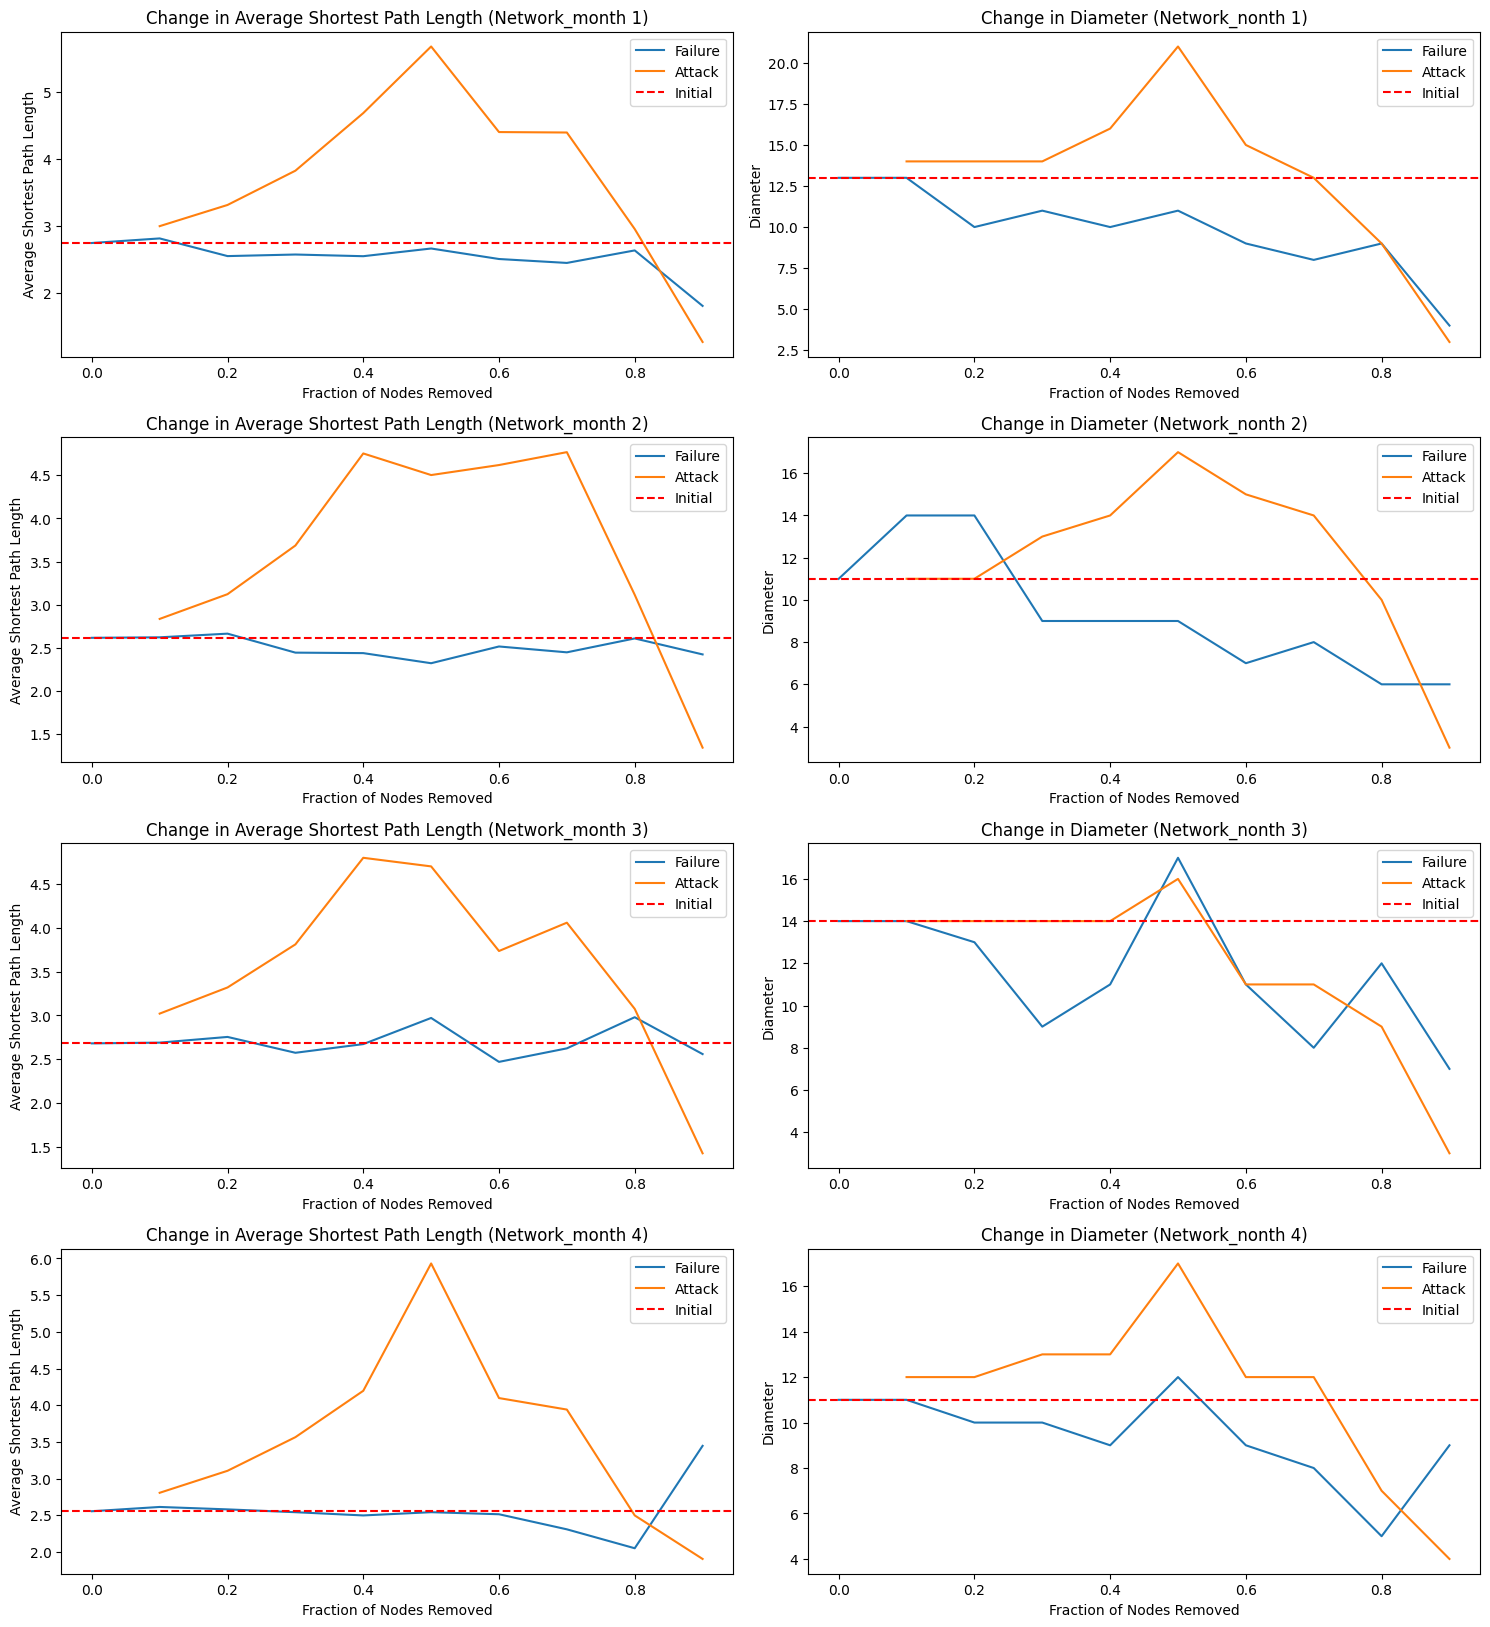

In [14]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store results for each network
results = []
networks=[G1,G2,G3,G4,G5]
for G in networks:
    # Calculate initial average shortest path length and diameter
    initial_avg_shortest_path_length = G.average_path_length()
    initial_diameter = G.diameter()

    # Define the fraction of nodes to remove
    fraction_to_remove = np.linspace(0, 0.9, 10)

    # Initialize lists to store results
    avg_shortest_path_lengths_random = []
    diameters_random = []
    avg_shortest_path_lengths_targeted = []
    diameters_targeted = []

    # Perform node deletion for each fraction
    for frac in fraction_to_remove:
        # Create copies of the original graph for each strategy
        G_random = G.copy()
        G_targeted = G.copy()

        # Determine number of nodes to remove
        num_nodes_to_remove = int(frac * G.vcount())

        # Random node deletion
        nodes_to_remove_random = np.random.choice(G_random.vs.indices, size=num_nodes_to_remove, replace=False)
        G_random.delete_vertices(nodes_to_remove_random)

        # Targeted node deletion (remove highest degree nodes)
        degrees = G_targeted.degree()
        nodes_to_remove_targeted = np.argsort(degrees)[-num_nodes_to_remove:]
        G_targeted.delete_vertices(nodes_to_remove_targeted)

        # Calculate average shortest path length and diameter after node deletion
        avg_shortest_path_lengths_random.append(G_random.average_path_length())
        diameters_random.append(G_random.diameter())
        avg_shortest_path_lengths_targeted.append(G_targeted.average_path_length())
        diameters_targeted.append(G_targeted.diameter())

    # Store the results for this network
    results.append({
        'initial_avg_shortest_path_length': initial_avg_shortest_path_length,
        'initial_diameter': initial_diameter,
        'avg_shortest_path_lengths_random': avg_shortest_path_lengths_random,
        'diameters_random': diameters_random,
        'avg_shortest_path_lengths_targeted': avg_shortest_path_lengths_targeted,
        'diameters_targeted': diameters_targeted
    })

# Plot the results for each network
plt.figure(figsize=(15, 20))  # Increase the figure size here

for i, result in enumerate(results):
    plt.subplot(5, 2, i * 2 + 1)
    plt.plot(fraction_to_remove, result['avg_shortest_path_lengths_random'], label='Failure')
    plt.plot(fraction_to_remove, result['avg_shortest_path_lengths_targeted'], label='Attack')
    plt.axhline(y=result['initial_avg_shortest_path_length'], color='r', linestyle='--', label='Initial')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Average Shortest Path Length')
    plt.title(f'Change in Average Shortest Path Length (Network_month {i + 1})')
    plt.legend()

    plt.subplot(5, 2, i * 2 + 2)
    plt.plot(fraction_to_remove, result['diameters_random'], label='Failure')
    plt.plot(fraction_to_remove, result['diameters_targeted'], label='Attack')
    plt.axhline(y=result['initial_diameter'], color='r', linestyle='--', label='Initial')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Diameter')
    plt.title(f'Change in Diameter (Network_nonth {i + 1})')
    plt.legend()

plt.tight_layout()
plt.show()
